### **CC57 - MACHINE LEARNING - PREPROCESAMIENTO DE DATOS**

#### **Transformación de datos:** Tecnica de Analisis de Componentes Principales (PCA) - Visualizacion de Componentes

# **Análisis de componentes principales (PCA)**

En palabras simples, reduce la cantidad de columnas sin pérdida de datos. Es un algoritmo de aprendizaje automático no supervisado.

Es un método de reducción de dimensionalidad que se utiliza a menudo para reducir la dimensionalidad de grandes conjuntos de datos, transformando un gran conjunto de variables en uno más pequeño que aún contiene la mayor parte de la información del conjunto grande.

Reducir el número de variables de un conjunto de datos naturalmente se produce a expensas de la precisión, pero el truco en la reducción de dimensionalidad es cambiar un poco de precisión por simplicidad. Porque los conjuntos de datos más pequeños son más fáciles de explorar y visualizar y hacen que el análisis de datos sea mucho más fácil y rápido para los algoritmos de aprendizaje automático sin variables extrañas que procesar.

Entonces, para resumir, la idea de PCA es simple: reducir la cantidad de variables de un conjunto de datos y preservar la mayor cantidad de información posible.

Recuerda el concepto de 2D a 1D en Graph

Aquí veamos cómo implementar el caso de uso de PCA.

**Librerias**

In [202]:
import matplotlib.pyplot as plt # Visualization
import pandas as pd             # importing Dataset and data manipulation
import numpy as np              # Creating Multi dimentional arrays
import seaborn as sns           # Complex Visualization
import scipy.stats as ss

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
%matplotlib inline
# this gives us the ability to display matplot within this notebook

**Conjunto de datos**

In [203]:
# El conjunto de datos: aquí trabajemos con el conjunto de datos sobre cáncer disponible integrado en sklearn.datasets
# por qué este conjunto de datos sobre cáncer porque tiene muchas o una gran cantidad de columnas y datos.
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [204]:
cancer.keys() # porque está en formato Diccionario.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [205]:
# DESCR es la descripción del conjunto de datos del diccionario.
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [206]:
#Vamos a cargarlo en un DataFrame
df= pd.DataFrame(cancer.data,columns=cancer['feature_names'])

In [207]:
# mostramos todas las columnas y filas en df DataFrame.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [208]:
#Observamos que el df mantiene 569 observaciones en 30 caracteristicas, variables, columnas o componentes, todas numericas
#No existen valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [209]:
#Identificamos la variables objetivo o target
print(cancer.target)
print(cancer.target_names)
print(np.array(np.unique(cancer.target, return_counts=True)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [210]:
#Adicionamos una caracteristica mas para el diagnostico (el target 0= maligno o1 = benigno)
df['diagnostico'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [211]:
#Identificamos las caracteriticas con mayor correlacion y las ordenamos en forma descendiente
#IMPORTANTE: la correlación define la relación entre dos variables independientes.
df_corr = df.corr()['diagnostico'].abs().sort_values(ascending=False)
df_corr

diagnostico                1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [212]:
# Obtenemos todas las características que tienen al menos 0,6 en correlación con el objetivo, que es el diagnostico
data = df_corr[df_corr > 0.6].index.to_list()[1:]
data

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

In [213]:
print('-------------------------')
print('Media de cada variable')
print('-------------------------')
print(df.mean())

-------------------------
Media de cada variable
-------------------------
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothn

In [214]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(df.var())

-------------------------
Varianza de cada variable
-------------------------
mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter     

Usamos la prueba de normalidad de shapiro se utiliza para probar la hipótesis nula de que los datos fueron extraídos de una distribución normal. Es una prueba comúnmente utilizada para verificar la normalidad antes de aplicar ciertos análisis estadísticos que asumen que los datos siguen una distribución normal


- Estadístico de la prueba (stat): Un valor que mide qué tan cerca están los datos de seguir una distribución normal.

- p-value: El valor p asociado a la prueba. Un valor pequeño (por ejemplo, menos de 0.05) indica que los datos no son normales, lo que lleva a rechazar la hipótesis nula.

Recordamos:
- p-value > 0.05: No se rechaza la hipótesis nula, es decir, los datos probablemente provienen de una distribución normal.
- p-value < 0.05: Rechazas la hipótesis nula, sugiriendo que los datos no siguen una distribución normal.

In [215]:
# Perform Shapiro-Wilk test for normality for each feature
for feature in df.columns:
    stat, p = ss.shapiro(df[feature])
    print(f'{feature}: statistic = {stat}, p-value = {p}')


mean radius: statistic = 0.9410693645477295, p-value = 3.105940390947179e-14
mean texture: statistic = 0.9767202734947205, p-value = 7.282039860001532e-08
mean perimeter: statistic = 0.9361824989318848, p-value = 7.011342749468257e-15
mean area: statistic = 0.858401894569397, p-value = 3.1965406234734204e-22
mean smoothness: statistic = 0.9874873757362366, p-value = 8.600336877861992e-05
mean compactness: statistic = 0.9169781804084778, p-value = 3.9676217698195954e-17
mean concavity: statistic = 0.8668311834335327, p-value = 1.3386320802392117e-21
mean concave points: statistic = 0.8916499018669128, p-value = 1.4044357116065472e-19
mean symmetry: statistic = 0.9725879430770874, p-value = 7.88140486207567e-09
mean fractal dimension: statistic = 0.9232844710350037, p-value = 1.9568644838391478e-16
radius error: statistic = 0.7455542087554932, p-value = 1.2245943699363603e-28
texture error: statistic = 0.8961677551269531, p-value = 3.560489086809403e-19
perimeter error: statistic = 0.718

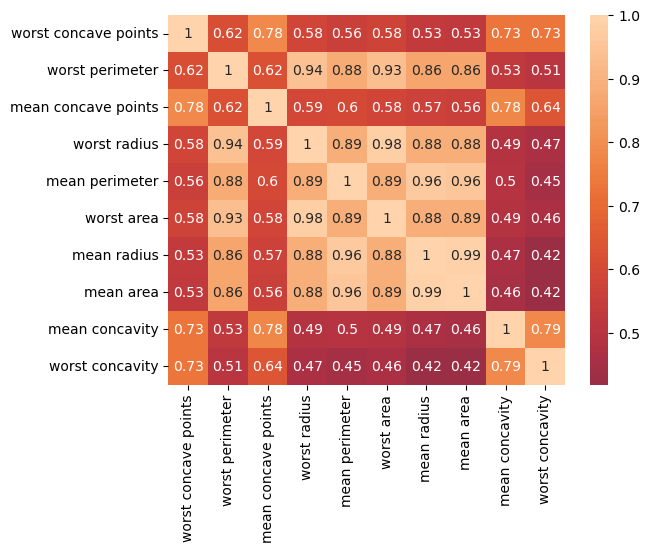

In [216]:
sns.heatmap(df.loc[:,data].corr(method = "kendall"), annot=True, center=0)
plt.show()

In [217]:
df_corr = df.loc[:, data].corr(method="kendall")
df_corr

,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,worst concavity
worst concave points,1.000000,0.615378,0.783933,0.581723,0.559819,0.575373,0.532569,0.528375,0.734047,0.729468
worst perimeter,0.615378,1.000000,0.620728,0.939026,0.881245,0.931692,0.862763,0.863409,0.531750,0.507132
mean concave points,0.783933,0.620728,1.000000,0.590400,0.596716,0.583169,0.566917,0.561760,0.775266,0.635728
worst radius,0.581723,0.939026,0.590400,1.000000,0.886941,0.979299,0.882063,0.883811,0.492914,0.468060
mean perimeter,0.559819,0.881245,0.596716,0.886941,1.000000,0.885246,0.963320,0.956965,0.497587,0.449549
worst area,0.575373,0.931692,0.583169,0.979299,0.885246,1.000000,0.882035,0.885906,0.488281,0.463746
mean radius,0.532569,0.862763,0.566917,0.882063,0.963320,0.882035,1.000000,0.985565,0.465087,0.421100
mean area,0.528375,0.863409,0.561760,0.883811,0.956965,0.885906,0.985565,1.000000,0.461843,0.418822
mean concavity,0.734047,0.531750,0.775266,0.492914,0.497587,0.488281,0.465087,0.461843,1.000000,0.787870
worst concavity,0.729468,0.507132,0.635728,0.468060,0.449549,0.463746,0.421100,0.418822,0.787870,1.000000


Prueba de Bartlett: La prueba de Bartlett verifica si las varianzas de las variables son iguales. Si el resultado de la prueba indica que las varianzas no son significativamente diferentes (es decir, si no se rechaza la hipótesis nula), esto sugiere que las variables son homogéneas en términos de varianza, lo que es ideal para el análisis PCA
- p _valor > 0 

In [230]:
ss.bartlett(df['worst radius'], df['worst perimeter'], df['worst area'], df['worst compactness'], df['worst concavity'], df['worst concave points'], df['diagnostico'], df['worst texture'], df['worst concave points'], df['worst symmetry'], df['worst fractal dimension'],df['mean perimeter'],df['mean area'],df['mean concavity'])

BartlettResult(statistic=78619.51016788972, pvalue=0.0)

## **Visualización PCA**

Aquí tenemos 30 dimensiones, así que primero las convertiremos en 2 dimensiones y luego visualizaremos el gráfico particular para ver si se puede hacer pca. El primer paso es siempre la normalización/estandarización (Standard Scalar).

Como hemos observado antes, es difícil visualizar datos de alta dimensión. Podemos usar PCA para encontrar los dos primeros componentes principales y visualizar los datos en este nuevo espacio bidimensional, con un único diagrama de dispersión. Antes de continuar con esto, necesitaremos escalar nuestros datos para que cada característica tenga una variación unitaria única.

Modelado

In [219]:
#Ahora visualicemos
# 1. reescala los valores
# todos los valores se convierten a la escala dada
#El primer paso como se mencionó es la normalización/estandarización.
from sklearn.preprocessing import StandardScaler

In [220]:
scaler=StandardScaler()

scaled_data = scaler.fit_transform(df.drop("diagnostico", axis=1))
target = pd.DataFrame(df['diagnostico'])


In [231]:
print(scaled_data.shape)
print(target.shape)

(569, 30)
(569, 1)


worst concave points	worst perimeter	mean concave points	worst radius	mean perimeter	worst area	mean radius	mean area	mean concavity	worst concavity

In [233]:
#Entrenamiento del modelo de Análisis de Componentes Principales
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity' ]])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [234]:
#Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [236]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']].columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
)

,worst radius,mean radius,worst perimeter,mean perimeter,worst concave points,mean concave points,worst area,mean area,worst concavity,mean concavity
PC1,0.332158,0.327738,0.336427,0.332474,0.306783,0.321757,0.325562,0.326591,0.251571,0.291467
PC2,-0.215263,-0.256972,-0.160239,-0.210379,0.329398,0.207320,-0.236716,-0.266718,0.588562,0.438896
PC3,-0.236460,0.060125,-0.209802,0.102063,-0.255295,0.548894,-0.198013,0.150531,-0.490350,0.466118
PC4,-0.056805,0.103620,-0.037562,0.103528,-0.702826,-0.359291,0.048851,0.211249,0.422783,0.353688
PC5,0.196808,-0.458433,0.177376,-0.421154,-0.201423,0.135603,0.625643,-0.147432,-0.145617,0.221233
PC6,-0.358642,-0.101380,-0.451628,-0.140794,0.293248,-0.157821,0.362997,0.626911,0.002794,-0.040164
PC7,0.026395,0.020268,0.149903,0.049415,0.333697,-0.615167,-0.073979,-0.092667,-0.386944,0.566048
PC8,0.533851,0.284195,-0.727594,-0.014721,0.015375,-0.026496,0.149608,-0.270887,-0.011689,0.088256
PC9,0.530647,-0.165290,0.048180,-0.439050,-0.008282,0.000130,-0.491848,0.503317,-0.006181,0.025659
PC10,0.222610,-0.695172,-0.161546,0.656848,0.004076,-0.026232,-0.058425,0.069754,0.002677,-0.025346


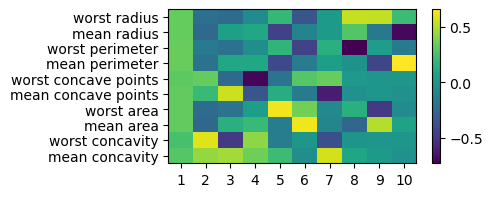

In [237]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']].columns)), 
           df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity' ]].columns)
plt.xticks(range(len(df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Evaluación

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[8.41482025e-01 1.14236367e-01 1.84151285e-02 1.32222875e-02
 8.47101069e-03 2.12882459e-03 1.34579184e-03 4.98438285e-04
 1.69367388e-04 3.07600988e-05]


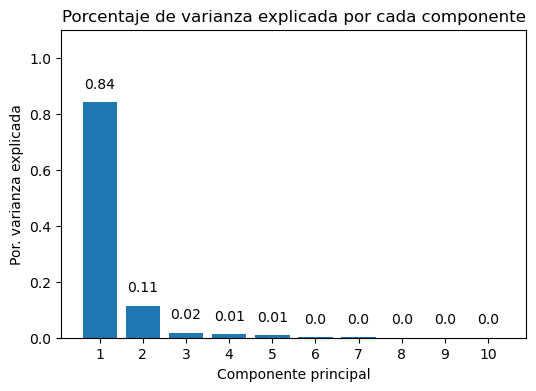

In [238]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.84148202 0.95571839 0.97413352 0.98735581 0.99582682 0.99795564
 0.99930143 0.99979987 0.99996924 1.        ]


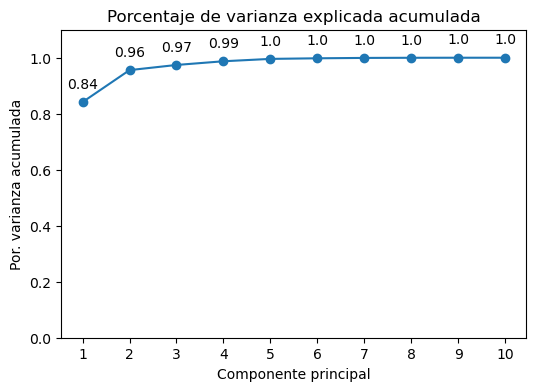

In [239]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [240]:
print(modelo_pca.explained_variance_ratio_)

[8.41482025e-01 1.14236367e-01 1.84151285e-02 1.32222875e-02
 8.47101069e-03 2.12882459e-03 1.34579184e-03 4.98438285e-04
 1.69367388e-04 3.07600988e-05]


In [241]:
print(modelo_pca.explained_variance_)

[8.42963507e+00 1.14437487e+00 1.84475495e-01 1.32455662e-01
 8.48592445e-02 2.13257252e-02 1.34816119e-02 4.99315817e-03
 1.69665570e-03 3.08142539e-04]


In [243]:
var_explicada = pd.DataFrame(modelo_pca.explained_variance_)
var_explicada.columns = ['var_explicada']
var_explicada = var_explicada.T
var_explicada.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

prop_var_explicada = pd.DataFrame(modelo_pca.explained_variance_ratio_)
prop_var_explicada.columns = ['prop_var_explicada']
prop_var_explicada = prop_var_explicada.T
prop_var_explicada.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
var_explicada

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
var_explicada,8.429635,1.144375,0.184475,0.132456,0.084859,0.021326,0.013482,0.004993,0.001697,0.000308


In [246]:
# Proyección de las observaciones de entrenamiento
componentes = pca_pipe.transform(X = df.loc[:,['worst radius','mean radius', 'worst perimeter','mean perimeter','worst concave points','mean concave points', 'worst area', 'mean area', 'worst concavity','mean concavity']])
componentes = pd.DataFrame(componentes)
componentes.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

In [247]:
componentes.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.979616,1.626657,0.024083,-0.336318,1.009733,-0.490488,0.134517,-0.165367,-0.079253,-0.047560
1,3.981389,-2.041346,-0.469845,-0.331986,-0.148354,0.351790,0.150295,0.109944,0.011817,0.002353
2,4.845096,0.130539,0.396395,-0.672429,-0.106548,0.173817,-0.060760,0.134645,0.000394,-0.004548
3,1.138169,3.786552,0.164912,-0.836010,0.163712,0.033862,0.169404,0.087416,0.130702,0.029301
4,4.277022,-0.594609,0.668149,0.405033,-0.302274,0.025238,0.002032,-0.034271,0.028560,0.011480


Entonces, nuestra PCA de datos ahora está normalizada/estandarizada con scikit Learn utiliza un proceso muy similar para preprocesar las funciones que vienen con Scikit Learn. Iniciamos un objeto PCA, encontramos los componentes principales usando el método de ajuste, luego aplicamos la rotación y la reducción de dimensionalidad llamando a transform().

In [189]:
# Esta es la función PCA de descomposición
from sklearn.decomposition import PCA

# aquí convertimos 30 funciones en 2
PCA=PCA(n_components=2)
PCA.fit(scaled_data)
x_pca=PCA.transform(scaled_data)

In [251]:
dataf = pd.concat([df.loc[:,['diagnostico']],componentes.loc[:,['PC1','PC2']]], axis = 1)
dataf.head(5)

,diagnostico,PC1,PC2
0,0,5.979616,1.626657
1,0,3.981389,-2.041346
2,0,4.845096,0.130539
3,0,1.138169,3.786552
4,0,4.277022,-0.594609


In [252]:
ss.spearmanr(dataf['PC1'],dataf['PC2'])

SignificanceResult(statistic=0.03487801287421133, pvalue=0.40631634168766984)

In [190]:
# Estos son los datos originales con 560 filas y 30 columnas
scaled_data.shape

(569, 30)

In [191]:
# ahora estos son los datos PCA que se convierten de 30 columnas a 2 columnas.
# Aquí hemos reducido 30 funciones a 2 funciones con éxito.
x_pca.shape

(569, 2)

In [192]:
#Aplicación del Análisis de Componentes Principales (PCA)

from sklearn.decomposition import PCA
components = None #aqui se incluyen los 30 componentes
pca = PCA(n_components = components)
# realizar PCA en los datos escalados
pca.fit(scaled_data)

# imprimir las varianzas explicadas
print("Varianza (Porcentaje):")
print(pca.explained_variance_ratio_ * 100)
print()
print("Varianzas acumuladas (Porcentaje):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()


Varianza (Porcentaje):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]

Varianzas acumuladas (Porcentaje):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



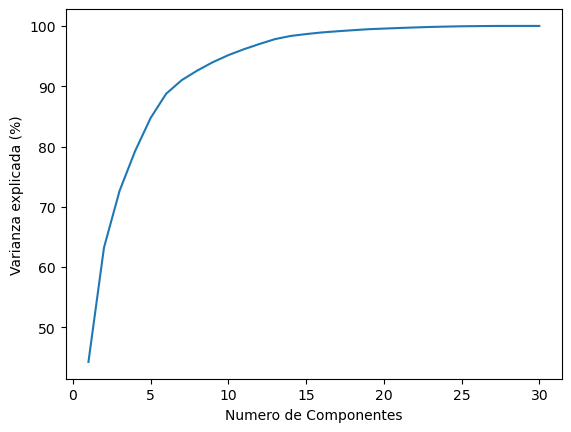

In [193]:
# Plot de la varianza explicada segun el total de carateristicas o componentes (de las 30 caracteristicas o componentes)
components = len(pca.explained_variance_ratio_)
if components > 0:
  plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
  plt.xlabel("Numero de Componentes")
  plt.ylabel("Varianza explicada (%)")


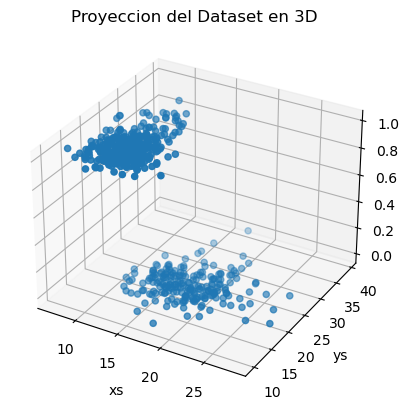

In [194]:
#Como ahora tenemos los datos en 3 dimensiones (30 variables y 1 target) ahora si que podemos ver de manera visual cómo
#están distribuidos nuestros datos

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = df.iloc[:,0]
ys = df.iloc[:,1]
zs = target

plt.xlabel('xs')
plt.ylabel('ys')

plt.title("Proyeccion del Dataset en 3D")
ax.scatter(xs=xs, ys=ys, zs=zs)

C:\Users\MSI\AppData\Local\Temp\ipykernel_22728\3383246570.py:13: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x', 'y', data=df1, linestyle='none', marker='o')


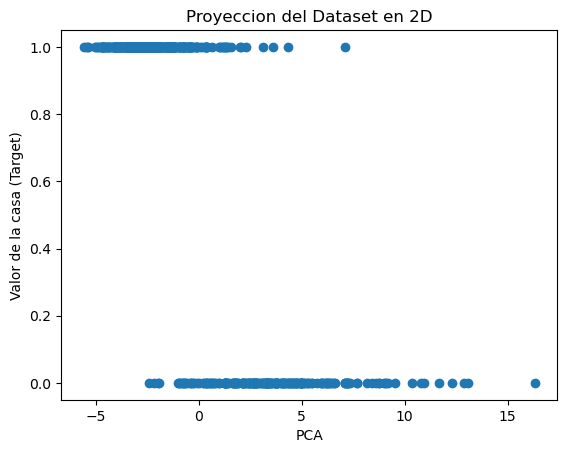

In [195]:
# Visualicemos ahora en una unica dimension
pca = PCA(n_components=1)
# Entrenamos el PCA con nuestros datos, y lo aplicamos a los datos
principalComponents1 = pca.fit_transform(scaled_data)
df1 = pd.DataFrame()
df1['x'] = list(principalComponents1)
df1['y'] = target
# plot
plt.xlabel('PCA')
plt.ylabel('Valor de la casa (Target)')

plt.title("Proyeccion del Dataset en 2D")
plt.plot( 'x', 'y', data=df1, linestyle='none', marker='o')
plt.show()

In [196]:
# Plot de la varianza explicada para los componentes mayores a 0.85
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(scaled_data)
print("Varianzas acumuladas (Porcentaje):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Numero de componentes: {components}')

Varianzas acumuladas (Porcentaje):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Numero de componentes: 6


[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

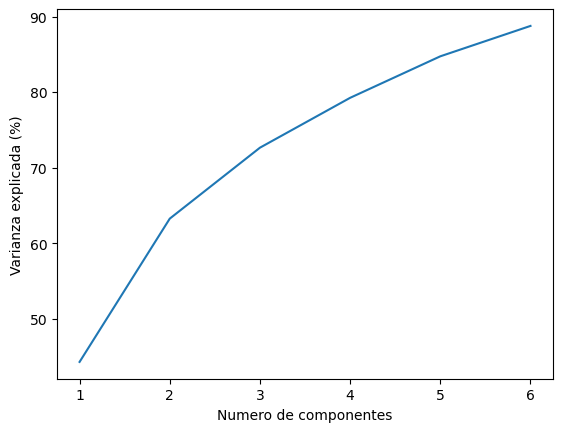

In [197]:
# Plot de la varianza explicada segun el total de carateristicas o componentes con mayor varianza
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza explicada (%)")
pca_components = abs(pca.components_)
print(pca_components)

In [198]:
print('Las 4 características más importantes de cada componente')
print('========================================================')
for row in range(pca_components.shape[0]):
    # obtener los índices de los 4 valores principales en cada fila
    temp = np.argpartition(-(pca_components[row]), 4)
    # ordenar los índices en orden descendente
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    # imprimir los 4 nombres de funciones principales
    print(f'Componente {row}: {df.columns[indices].to_list()}')

Las 4 características más importantes de cada componente
Componente 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness']
Componente 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius']
Componente 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry']
Componente 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness']
Componente 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry']
Componente 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry']


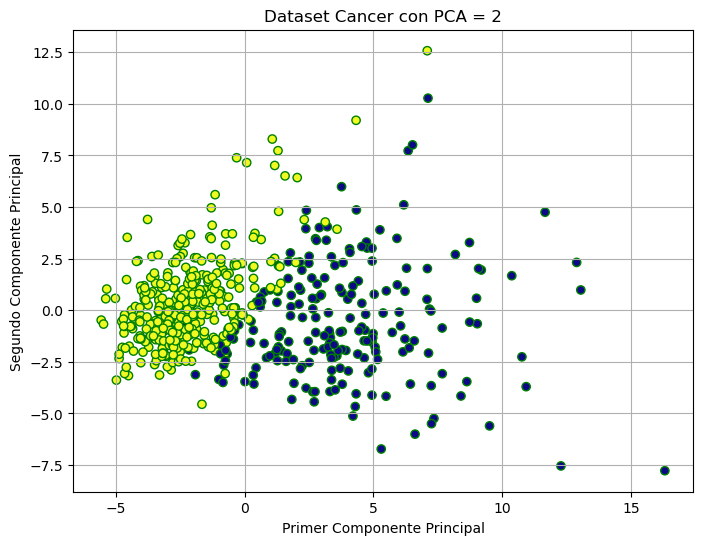

In [199]:
# Visualizamos el diagrama de dispersion
plt.figure(figsize=(8,6))
# aquí c=cancer['target']- en base a eso obtenemos el color
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma',edgecolors='g')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid()
plt.title("Dataset Cancer con PCA = 2")
plt.show()